Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import tree 
%matplotlib inline 

In [10]:
heart_disease_uci = pd.read_csv('heart.csv') 

In [11]:
heart_disease_uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# Посмотрим какие данные и есть ли пустые строки, а также какие значения необходимо менять на числовые, чтобы корректно работать
heart_disease_uci.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Выберем в переменную X, y только нужные колонки

In [13]:
X = heart_disease_uci.drop('target', 1)
y = heart_disease_uci['target'] 

In [14]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5) 

In [15]:
# Обучим наш "случайный лес" на выборке данных
rf.fit(X, y) 

RandomForestClassifier(max_depth=5, n_estimators=10)

In [18]:
# Посмотрим его точность на тестовом множестве 
rf.score(X, y) 

0.9174917491749175

In [19]:
# Сохраним в переменную массив со значениями, которые показывают насколько часто использовались и вносили свой вклад в нашу точность предсказаний
feature_importances = rf.feature_importances_

In [20]:
# Сделаем DataFrame 
feature_importances_df = pd.DataFrame({'features': list(X), 
                                      'feature_importances': feature_importances}) 

In [25]:
# Посмотрим на таблицу с вероятностями предсказаний
feature_importances_df.sort_values('feature_importances', ascending=False, inplace=True, ignore_index=True)

<AxesSubplot:xlabel='feature_importances', ylabel='features'>

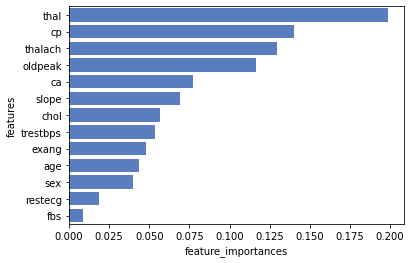

In [26]:
# Посмотрим на распределение в столбчатой диаграмме
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=feature_importances_df,
            label="importance", color="b")